In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio
import cartopy.crs as ccrs
import gdal
import os
%matplotlib inline
plt.rcParams["font.family"] = "Arial"

In [30]:
points ='/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg'
points = gpd.read_file(points)
pointsGeom = points['geometry'].explode()
points

,id,Class,ADM3_EN,geometry
0,None,Rain-fed Rice,Carles,MULTIPOINT (513897.000 1277640.000)
1,None,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1277640.000)
2,None,Rain-fed Rice,Carles,MULTIPOINT (515897.000 1277640.000)
3,None,Rain-fed Rice,Carles,MULTIPOINT (512897.000 1275640.000)
4,None,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1275640.000)
...,...,...,...,...
1205,None,Rain-fed Rice,San Joaquin,MULTIPOINT (399897.000 1167640.000)
1206,None,Rain-fed Rice,San Joaquin,MULTIPOINT (394897.000 1166640.000)
1207,None,Rain-fed Rice,San Joaquin,MULTIPOINT (397897.000 1163640.000)
1208,None,Rain-fed Rice,San Joaquin,MULTIPOINT (392897.000 1160640.000)


In [31]:
filesPath='/Users/delatorredm/Downloads/CH4_GEEOUTPUT'

def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]
 
filesList = list_full_paths(filesPath)
filesList.sort()

<AxesSubplot:>

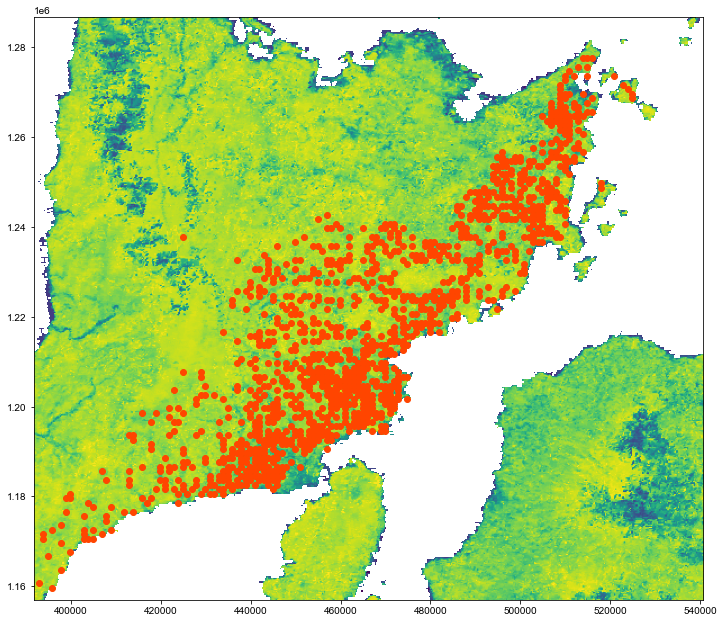

In [32]:
fig, ax = plt.subplots(figsize=(12,12))
points.plot(ax=ax, color='orangered')
show(xds, ax=ax)


In [33]:
import fnmatch
pattern = '*NDVI*'
matching = fnmatch.filter(filesList, pattern)
range(len(matching))

range(0, 216)

In [34]:
for i in range(len(matching)):
    xds = rasterio.open(matching[i])
    raster = []
    for point in pointsGeom:
        x = point.x
        y = point.y
        row, col = xds.index(x,y)
        raster.append(xds.read(1)[row,col])
    points[os.path.splitext(os.path.basename(xds.name))[0]]=raster
points




/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  super(GeoDataFrame, self).__setitem__(key, value)


,id,Class,ADM3_EN,geometry,NDVI_2001-01,NDVI_2001-02,NDVI_2001-03,NDVI_2001-04,NDVI_2001-05,NDVI_2001-06,...,NDVI_2018-03,NDVI_2018-04,NDVI_2018-05,NDVI_2018-06,NDVI_2018-07,NDVI_2018-08,NDVI_2018-09,NDVI_2018-10,NDVI_2018-11,NDVI_2018-12
0,None,Rain-fed Rice,Carles,MULTIPOINT (513897.000 1277640.000),0.5431,0.6255,0.5154,0.3636,0.4547,0.7077,...,0.5829,0.4402,0.3489,0.6013,0.6244,0.5672,0.6061,0.4949,0.6518,0.7038
1,None,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1277640.000),0.6740,0.5439,0.6549,0.4535,0.4957,0.5048,...,0.6408,0.5323,0.4030,0.4971,0.7851,0.8725,0.7591,0.6074,0.6226,0.7581
2,None,Rain-fed Rice,Carles,MULTIPOINT (515897.000 1277640.000),0.6642,0.7100,0.6555,0.5992,0.6019,0.5397,...,0.6437,0.5579,0.4423,0.6117,0.7879,0.8342,0.6663,0.6411,0.7039,0.6994
3,None,Rain-fed Rice,Carles,MULTIPOINT (512897.000 1275640.000),0.7133,0.7440,0.6854,0.5809,0.7114,0.7784,...,0.6394,0.7347,0.5341,0.6488,0.8111,0.6657,0.7654,0.8086,0.7953,0.8574
4,None,Rain-fed Rice,Carles,MULTIPOINT (514897.000 1275640.000),0.6837,0.6921,0.7656,0.6152,0.5956,0.7191,...,0.6987,0.5953,0.5267,0.7257,0.6401,0.8444,0.8460,0.7180,0.8621,0.8136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,None,Rain-fed Rice,San Joaquin,MULTIPOINT (399897.000 1167640.000),0.7502,0.4877,0.7209,0.6436,0.8245,0.6442,...,0.6603,0.7653,0.7797,0.8757,0.3728,0.6040,0.8861,0.7831,0.8467,0.8142
1206,None,Rain-fed Rice,San Joaquin,MULTIPOINT (394897.000 1166640.000),0.7452,0.6988,0.6815,0.6689,0.8035,0.8324,...,0.7007,0.7488,0.7378,0.7680,0.8162,0.6804,0.8761,0.8649,0.8169,0.7499
1207,None,Rain-fed Rice,San Joaquin,MULTIPOINT (397897.000 1163640.000),0.7629,0.6931,0.6967,0.6900,0.7896,0.8600,...,0.6080,0.6110,0.7647,0.8661,0.8429,0.8726,0.8230,0.8238,0.7510,0.7137
1208,None,Rain-fed Rice,San Joaquin,MULTIPOINT (392897.000 1160640.000),0.7565,0.6936,0.6320,0.6233,0.7724,0.6074,...,0.8888,0.7704,0.7295,0.7872,0.7778,0.6854,0.7988,0.8253,0.8157,0.8030


In [97]:
pointsSubbed = points.drop(columns=['id','geometry']).melt(id_vars=["Class", "ADM3_EN"], var_name="Index", value_name='value')
pointsSubbed['Date'] = pointsSubbed['Index'].str.split('_', n=1, expand=True)[1]
pointsSubbed = pointsSubbed.loc[(pointsSubbed['Class']=='Rain-fed Rice') &
                 (pointsSubbed['Date']=='2016-12')
                ].reset_index(drop=True)
pointsSubbed = pointsSubbed.groupby(['ADM3_EN']).mean().reset_index(drop=False)

startYear = 2017
endYear = 2017 #2017

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
actual = actual[(actual.year <= endYear) & (actual.year >= startYear)].groupby('muni').mean().reset_index(drop=False)

merged = pd.merge(actual, pointsSubbed, left_on='muni', right_on='ADM3_EN')

#df = pd.DataFrame(merged,columns=['value','yr1',	'yr3',	'yr5',	'yr10','yr15','test'])
merged[['value_x','value_y']].corr()

,value_x,value_y
value_x,1.000000,0.200551
value_y,0.200551,1.000000


In [86]:
pointsSubbed = points.drop(columns=['id','geometry']).melt(id_vars=["Class", "ADM3_EN"], var_name="Index", value_name='value')
pointsSubbed['Date'] = pointsSubbed['Index'].str.split('_', n=1, expand=True)[1]
pointsSubbed = pointsSubbed.loc[(pointsSubbed['Class']=='Rain-fed Rice') &
                 (pointsSubbed['Date']=='2016-12')
                ].reset_index(drop=True)
pointsSubbed

,Class,ADM3_EN,Index,value,Date
0,Rain-fed Rice,Carles,NDVI_2016-12,0.8454,2016-12
1,Rain-fed Rice,Carles,NDVI_2016-12,0.8688,2016-12
2,Rain-fed Rice,Carles,NDVI_2016-12,0.8185,2016-12
3,Rain-fed Rice,Carles,NDVI_2016-12,0.8340,2016-12
4,Rain-fed Rice,Carles,NDVI_2016-12,0.8336,2016-12
...,...,...,...,...,...
952,Rain-fed Rice,San Joaquin,NDVI_2016-12,0.7957,2016-12
953,Rain-fed Rice,San Joaquin,NDVI_2016-12,0.8400,2016-12
954,Rain-fed Rice,San Joaquin,NDVI_2016-12,0.7544,2016-12
955,Rain-fed Rice,San Joaquin,NDVI_2016-12,0.8378,2016-12


In [195]:
vals = ['NDVI_2016-12','NDVI_2016-11','NDVI_2016-10']
sub = points[['Class','ADM3_EN','geometry','NDVI_2016-10','NDVI_2016-11','NDVI_2016-12','NDVI_2017-01','NDVI_2017-06','NDVI_2017-07','NDVI_2017-08']]
sub['NovDec']=sub[['NDVI_2016-11','NDVI_2016-12']].sum(axis=1)
sub['OctNovDec']=sub[['NDVI_2016-10','NDVI_2016-11','NDVI_2016-12']].sum(axis=1)
sub['JulAug']=sub[['NDVI_2017-07','NDVI_2017-08']].sum(axis=1)
sub['JunJulAug']=sub[['NDVI_2017-06','NDVI_2017-07','NDVI_2017-08']].sum(axis=1)
sub['All']=sub[['NDVI_2016-10','NDVI_2016-11','NDVI_2016-12','NDVI_2017-06','NDVI_2017-07','NDVI_2017-08']].sum(axis=1)
sub['DecAug']=sub[['NDVI_2016-12','NDVI_2017-08']].sum(axis=1)
sub['DecJulAug']=sub[['NDVI_2016-12','NDVI_2017-07','NDVI_2017-08']].sum(axis=1)

pointsSubbed = sub.drop(columns=['geometry']).melt(id_vars=["Class", "ADM3_EN"], var_name="Index", value_name='value')
#pointsSubbed['Date'] = pointsSubbed['Index'].str.split('_', n=1, expand=True)[1]
pointsSubbed = pointsSubbed.loc[(pointsSubbed['Class']=='Irrigated Rice') &
                 (pointsSubbed['Index']=='DecJulAug')
                ].reset_index(drop=True)
pointsSubbed

pointsSubbed = pointsSubbed.groupby(['ADM3_EN']).mean().reset_index(drop=False)

startYear = 2017
endYear = 2017 #2017

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'irri')].reset_index(drop=True)
actual = actual[(actual.year <= endYear) & (actual.year >= startYear)].groupby('muni').mean().reset_index(drop=False)

merged = pd.merge(actual, pointsSubbed, left_on='muni', right_on='ADM3_EN')

#df = pd.DataFrame(merged,columns=['value','yr1',	'yr3',	'yr5',	'yr10','yr15','test'])
merged[['value_x','value_y']].corr()

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,value_x,value_y
value_x,1.00000,0.56176
value_y,0.56176,1.00000


In [160]:
sub = points[['Class','ADM3_EN','geometry','NDVI_2016-10','NDVI_2016-11','NDVI_2016-12','NDVI_2017-01','NDVI_2017-06','NDVI_2017-07','NDVI_2017-08']]
sub['NovDec']=sub[['NDVI_2016-11','NDVI_2016-12']].sum(axis=1)
sub['OctNovDec']=sub[['NDVI_2016-10','NDVI_2016-11','NDVI_2016-12']].sum(axis=1)
sub['JulAug']=sub[['NDVI_2017-07','NDVI_2017-08']].sum(axis=1)
sub['JunJulAug']=sub[['NDVI_2017-06','NDVI_2017-07','NDVI_2017-08']].sum(axis=1)
sub['All']=sub[['NDVI_2016-10','NDVI_2016-11','NDVI_2016-12','NDVI_2017-06','NDVI_2017-07','NDVI_2017-08']].sum(axis=1)
sub['DecAug']=sub[['NDVI_2016-12','NDVI_2017-08']].sum(axis=1)
sub['DecJulAug']=sub[['NDVI_2016-12','NDVI_2017-07','NDVI_2017-08']].sum(axis=1)

pointsSubbed = sub.drop(columns=['geometry']).melt(id_vars=["Class", "ADM3_EN"], var_name="Index", value_name='value')
#pointsSubbed['Date'] = pointsSubbed['Index'].str.split('_', n=1, expand=True)[1]
pointsSubbed = pointsSubbed.loc[(pointsSubbed['Index']=='DecJulAug')
                ].reset_index(drop=True)
pointsSubbed

pointsSubbed = pointsSubbed.groupby(['ADM3_EN']).mean().reset_index(drop=False)

startYear = 2017
endYear = 2017 #2017

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'all')].reset_index(drop=True)
actual = actual[(actual.year <= endYear) & (actual.year >= startYear)].groupby('muni').mean().reset_index(drop=False)

merged = pd.merge(actual, pointsSubbed, left_on='muni', right_on='ADM3_EN')

#df = pd.DataFrame(merged,columns=['value','yr1',	'yr3',	'yr5',	'yr10','yr15','test'])
merged[['value_x','value_y']].corr()

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,value_x,value_y
value_x,1.000000,0.374184
value_y,0.374184,1.000000


In [162]:
pattern = '*EVI*'
matching = fnmatch.filter(filesList, pattern)

for i in range(len(matching)):
    xds = rasterio.open(matching[i])
    raster = []
    for point in pointsGeom:
        x = point.x
        y = point.y
        row, col = xds.index(x,y)
        raster.append(xds.read(1)[row,col])
    points[os.path.splitext(os.path.basename(xds.name))[0]]=raster

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  super(GeoDataFrame, self).__setitem__(key, value)


In [193]:
sub = points[['Class','ADM3_EN','geometry','EVI_2016-10','EVI_2016-11','EVI_2016-12','EVI_2017-01','EVI_2017-06','EVI_2017-07','EVI_2017-08']]
sub['NovDec']=sub[['EVI_2016-11','EVI_2016-12']].sum(axis=1)
sub['OctNovDec']=sub[['EVI_2016-10','EVI_2016-11','EVI_2016-12']].sum(axis=1)
sub['JulAug']=sub[['EVI_2017-07','EVI_2017-08']].sum(axis=1)
sub['JunJulAug']=sub[['EVI_2017-06','EVI_2017-07','EVI_2017-08']].sum(axis=1)
sub['All']=sub[['EVI_2016-10','EVI_2016-11','EVI_2016-12','EVI_2017-06','EVI_2017-07','EVI_2017-08']].sum(axis=1)
sub['DecAug']=sub[['EVI_2016-12','EVI_2017-08']].sum(axis=1)
sub['DecJulAug']=sub[['EVI_2016-12','EVI_2017-07','EVI_2017-08']].sum(axis=1)

pointsSubbed = sub.drop(columns=['geometry']).melt(id_vars=["Class", "ADM3_EN"], var_name="Index", value_name='value')
#pointsSubbed['Date'] = pointsSubbed['Index'].str.split('_', n=1, expand=True)[1]
pointsSubbed = pointsSubbed.loc[(pointsSubbed.Index==
                                 #'EVI_2016-10'
                                 #'EVI_2016-11'
                                 #'EVI_2016-12'
                                 #'EVI_2017-01'
                                 #'EVI_2017-06'
                                 #'EVI_2017-07'
                                 #'EVI_2017-08'
                                 #'NovDec'
                                 #'OctNovDec'
                                 #'JulAug'
                                 #'JunJulAug'
                                 #'DecAug'
                                 'DecJulAug'
                                 #'All'
                                ) & (pointsSubbed.Class=='Rain-fed Rice')
                ].reset_index(drop=True)
pointsSubbed

pointsSubbed = pointsSubbed.groupby(['ADM3_EN']).mean().reset_index(drop=False)

startYear = 2017
endYear = 2017 #2017

actual = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
actual = actual[(actual.param == 'yield') & (actual.ecosystem == 'rf')].reset_index(drop=True)
actual = actual[(actual.year <= endYear) & (actual.year >= startYear)].groupby('muni').mean().reset_index(drop=False)

merged = pd.merge(actual, pointsSubbed, left_on='muni', right_on='ADM3_EN')

#df = pd.DataFrame(merged,columns=['value','yr1',	'yr3',	'yr5',	'yr10','yr15','test'])
merged[['value_x','value_y']].corr()

/Users/delatorredm/miniconda3/envs/ee/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,value_x,value_y
value_x,1.000000,-0.015811
value_y,-0.015811,1.000000


In [167]:
merged

,muni,year,value_x,ADM3_EN,value_y
0,Ajuy,2017.0,3.377339,Ajuy,0.510294
1,Alimodian,2017.0,3.596583,Alimodian,0.550358
2,Anilao,2017.0,3.455836,Anilao,0.614131
3,Balasan,2017.0,3.319242,Balasan,0.487800
4,Barotac Viejo,2017.0,3.678698,Barotac Viejo,0.537936
5,Cabatuan,2017.0,3.260271,Cabatuan,0.516955
6,Calinog,2017.0,3.562004,Calinog,0.521260
7,Carles,2017.0,2.686869,Carles,0.503359
8,City of Passi,2017.0,3.536332,City of Passi,0.536124
9,Concepcion,2017.0,3.679632,Concepcion,0.534508
